In [3]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [20]:
df = pd.read_excel('../Outputs/GIS_Lump_Excels/Lump0816_365_515.xlsx')

#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]

# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

#convet area to ha
df['AREA_08_ha'] = (df['AREA_08_M2'] / 10000).astype(int)
df['AREA_16_ha'] = (df['AREA_16_M2'] / 10000).astype(int)

# Group by land use and calculate the sum of area
df16 = df.groupby('secon_16')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8 = df.groupby('secon_08')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

#dflabel = df.groupby('secon_16')['AREA_16_M2'].agg([
    #np.sum,
    #np.mean,
    #np.count_nonzero,]).reset_index()
    

#Change the column names so that they can be concatinated
df16.columns = ['Land Use', 'Sum', 'Mean', 'Std', 'Count non zero']
df8.columns = ['Land Use', 'Sum', 'Mean', 'Std','Count non zero']


concat = pd.concat([df16, df8])

final = pd.merge(df16, df8,
                left_on='Land Use', right_on='Land Use',
                how = 'left')

#Change the column names so for analysis
final.columns = ['Land Use', 'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016',
              'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008']

final['Change Sum'] = (final['Sum 2016'] - final['Sum 2008'])

final = final[['Land Use', 'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008',
                  'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016', 'Change Sum']]

final=final[1:]
final.to_excel('../Outputs/Pandas_Lump_Excels/LumpIrr_Grouped_Lump0816_365_515.xlsx')
final

,Land Use,Sum 2008,Mean 2008,Std 2008,Count 2008,Sum 2016,Mean 2016,Std 2016,Count 2016,Change Sum
1,36,nan,nan,nan,nan,48,6,5,7,nan
2,41,nan,nan,nan,nan,6282,55,101,110,nan
3,42,"1,343",54,63,22,861,54,40,16,-482
4,43,"12,313",111,321,105,1855,41,61,33,"-10,458"
5,44,"37,899",12,27,"2,614",14257,5,11,1844,"-23,642"
6,45,"15,037",44,96,314,7630,9,37,455,"-7,407"
7,46,"6,321",22,51,262,4309,17,40,223,"-2,012"
8,51,50,1,2,16,119,1,3,29,69


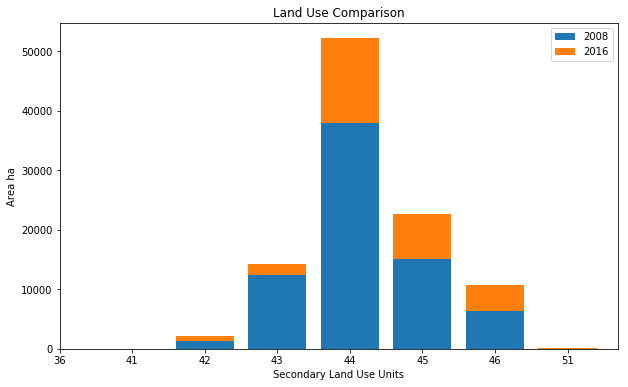

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
plt.rcParams['figure.figsize']=(10,6)
Sum2008 = final['Sum 2008']
Sum2016 = final['Sum 2016']

ind = np.arange(N)    # the x locations for the groups
width = 0.80

# the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Sum2008, width,)
p2 = plt.bar(ind, Sum2016, width,
             bottom=Sum2008,)

plt.ylabel('Area ha')
plt.title('Land Use Comparison')
plt.xticks(ind, final['Land Use'])
plt.xlabel('Secondary Land Use Units')
plt.legend((p1[0], p2[0]), ('2008', '2016'))

plt.show()

In [24]:

#grouped by commodity only
df16_comod = df.groupby('COMMOD_DES')['AREA_16_ha'].agg(np.sum).reset_index()

df8_comod = df.groupby('COMMOD_DES')['AREA_08_ha'].agg(np.sum).reset_index()

#Change the column names so that they can be concatinated
df16_comod.columns = ['Commodity', 'Sum']
df8_comod.columns = ['Commodity', 'Sum']

concat = pd.concat([df16_comod, df8_comod])

final_comod = pd.merge(df16_comod, df8_comod,
                left_on='Commodity', right_on='Commodity',
                how = 'left')

#Change the column names so for analysis
final_comod.columns = ['Commodity', 'Sum 2016','Sum 2008']

#reorder the table
final_comod = final_comod[['Commodity', 'Sum 2008', 'Sum 2016']]


#calculate %area change and %count count change
final_comod['Change Area'] = (final_comod['Sum 2016'] - final_comod['Sum 2008'])
final_comod=final_comod[1:]
final_comod  

,Commodity,Sum 2008,Sum 2016,Change Area
1,alkaloid poppies,0,173,173
2,alto panicum and mekong grass,50,28,-22
3,avocado,0,0,0
4,bamboo,8,0,-8
5,bananas,287,72,-215
6,beans,415,72,-343
7,belimbing,7,0,-7
8,bitter melons,53,10,-43
9,cabbages,402,3,-399
10,caimito,77,52,-25


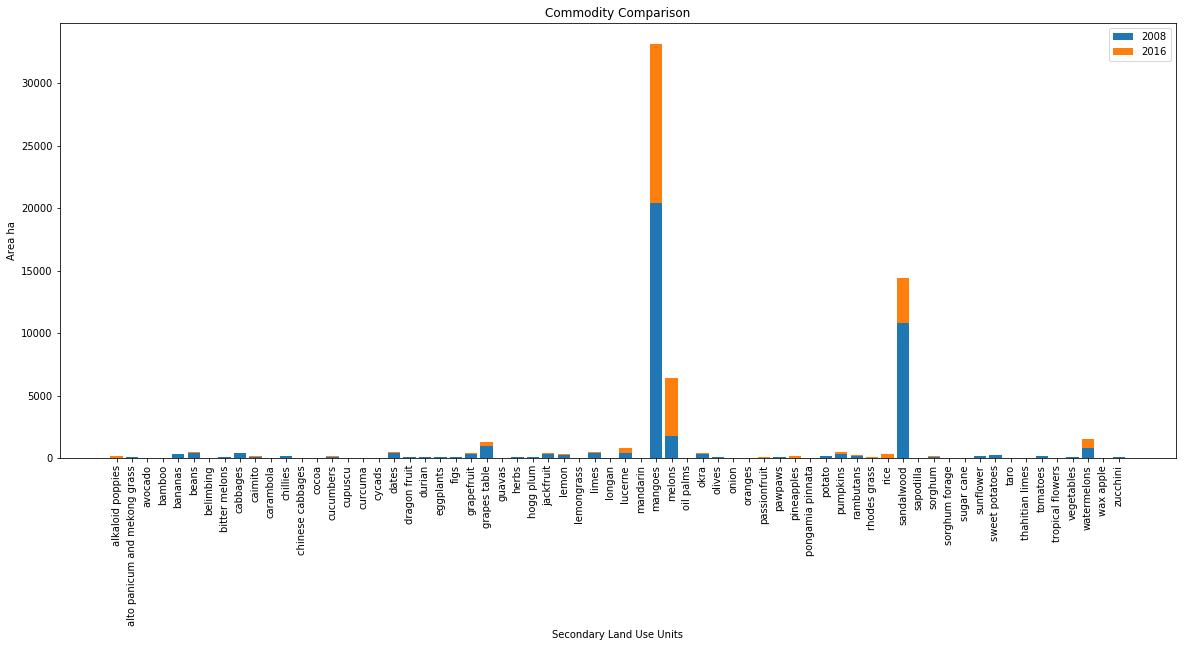

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N = 66
plt.rcParams['figure.figsize']=(20,8)
Sum2008 = final_comod['Sum 2008']
Sum2016 = final_comod['Sum 2016']

ind = np.arange(N)    # the x locations for the groups
width = 0.80      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Sum2008, width,)
p2 = plt.bar(ind, Sum2016, width,
             bottom=Sum2008,)

plt.ylabel('Area ha')
plt.title('Commodity Comparison')
plt.xticks(ind, final_comod['Commodity'], rotation = 'vertical')
plt.xlabel('Secondary Land Use Units')
plt.legend((p1[0], p2[0]), ('2008', '2016'))

plt.show()